# Homework #1 - Matrices and Data
Cory Randolph

6/14/2022

CMPE 257

# 1 Matrices and Numpy

## 1.1 Matrices Theory

### 1.1.1 Write properties of matrices

Matrices from a high level are a way of storing data (mostly numerical) in a structured way that allows for various computations/manipulations.

In particular the most common form of a matrix is a nxm (n = rows, m = columns) that holds 2 dimensional numerical data.

Specific Properties of Matrices:

1.   Non-commutative property
  - AB != BA
2.   Associative Property
  - (AB)C=A(BC)
3.   Distributive properties 
  - A(B+C)=AB+AC
4.   Multiplicative identity property
  - AI=A (Where I is the identity matrix)
5.   Multiplicative property of zero
  - OA = O (Where O is the zero matrix)
6.   Dimension Property
  - The dimensions of an m x n times n x k matrix is a m x k matrix


See reference section for details

### 1.1.2 Write a python function to get a matrix from user

In [1]:
import ast

In [2]:
def get_user_matrix() -> list:
  # Get users input
  A: list = input(f"Please input your matrix in the form of a 2 dimensional list:")
  
  # Create a default matrix if the user input is empty
  if not A:
      A = "[[1,2],[3,4]]"

  # Make sure the users input is read converted to a python list
  A = ast.literal_eval(A)

  return A

In [3]:
def pretty_print_matrix(A: list = [[1,2], [3,4]]):
  # Loop through each row and column and print out the matrix is a way that
  # looks nicer than the array version.
  # (Ref: https://www.codegrepper.com/code-examples/python/how+to+print+2d+array+in+python)
  for row in A:
      for column in row:
          print(column,end = " ")
      print()

  return


Call the function to get the users input

In [4]:
# Assign the users input to the variable A
A = get_user_matrix()

# Print out the users matrix A
pretty_print_matrix(A)

Please input your matrix in the form of a 2 dimensional list:
1 2 
3 4 


### 1.1.3 Get two matrices from the user and give them names A and B

Use the same function from above but now call it twice and assign the input to A and B.

In [5]:
print(f"For the first matrix A:")
A: list = get_user_matrix()

print(f"For the second matrix B:")
B: list = get_user_matrix()

For the first matrix A:
Please input your matrix in the form of a 2 dimensional list:
For the second matrix B:
Please input your matrix in the form of a 2 dimensional list:


Print out both matrices:

In [6]:
print(f"Matrix A:")
pretty_print_matrix(A)

print(f"Matrix B:")
pretty_print_matrix(B)

Matrix A:
1 2 
3 4 
Matrix B:
1 2 
3 4 


## 1.2 Matrix manipulation without using Numpy

For all of these functions I will assume a 2x2 matrix, but most formulas should work for nxn.

### 1.2.1 Perform A^n (n is a user entered values)

First create a matrix multiplication function so that I could call that on A recursively n times

In [7]:
def matrix_multiplication(A: list, B: list) -> list:
  # First verify that the dimensions of A and B are compatible. i.e. m x n and n x k
  if len(A) <1 or len(B[0]) < 1:
    raise Exception("Matrices provided do not have enough rows or columns") 

  if len(A) != len(B[0]):
    raise Exception("The number of columns from matrix A must match the number of rows in Matrix B.")

  # Write out the matrix multiplication
  AxB = []
  # Create the empty matrix with the correct m x k size
  for i in range(len(A)):
    row = []
    for j in range(len(B[0])):
        row.append(0)
    AxB.append(row)
 
  # Apply Matrix multiplication
  for i in range(len(A)): # Number of rows in A
    for j in range(len(B[0])): # Number of columns in B
      AxB[i][j] = 0 # Create a 0 matrix of m x k 
      for k in range(len(B)): # number of Rows in B
        AxB[i][j] += A[i][k] * B[k][j]

  return AxB

Test out the custom matrix multiplication function.

In [8]:
# Define A and B matrix if not provide by the user
if A is None:
  A = [
      [1,2],
      [3,4],
  ]

if B is None:
  B = [
      [5,6],
      [7,8],
  ]


In [9]:
print(matrix_multiplication(A,B))

[[19, 22], [43, 50]]


In [10]:
pretty_print_matrix(matrix_multiplication(A,B))

19 22 
43 50 


Now use the matrix multiplication to create the raised to n function. Also define some smaller functions like idenity and copy that will be used later

In [90]:
def matrix_identity(A: list) -> list:
  # First define the identity matrix
  identity_matrix = []
  for i in range(len(A)):
    row = []
    for j in range(len(A[0])):
        if i == j:
          row.append(1)
        else:
          row.append(0)
    identity_matrix.append(row)

  return identity_matrix

In [123]:
matrix_identity(A)

[[1, 0], [0, 1]]

In [122]:
def matrix_copy(A: list) -> list:
  A_copy = []
  for i in range(len(A)):
    row = []
    for j in range(len(A[0])):
        row.append(A[i][j])
    A_copy.append(row)
  return A_copy

In [124]:
matrix_copy(A)

[[1, 2], [3, 4]]

In [125]:
def matrix_raise_to_n(A: list, n: str) -> list:
  # Cover base case when n = 0
  if n == 0:
    # Return the identity matrix when n = 0
    return matrix_identity(A)


  # Initiate result as the input matrix
  result = matrix_copy(A)

  # Multiply the previous result n-1 times
  for i in range(n-1):
    result = matrix_multiplication(result, A)

  return result

Apply A^3 as example

In [161]:
pretty_print_matrix(matrix_raise_to_n(A, n=3))

37 54 
81 118 


Apply the raise to n function to a simple matrix

In [126]:
C = [[2,0],[0,2]]

In [127]:
matrix_raise_to_n(A = C, n=3)

[[8, 0], [0, 8]]

Show that it works with a larger matrix

In [29]:
D = [
     [2,0,0,0],
     [0,2,0,0],
     [0,0,2,0],
     [0,0,0,2],
     ]

In [30]:
pretty_print_matrix(matrix_raise_to_n(A = D, n=3))

8 0 0 0 
0 8 0 0 
0 0 8 0 
0 0 0 8 


### 1.2.2 Perform A Transpose

In [128]:
def matrix_transpose(A: list) -> list:
  # Create an empty transpose matrix/list
  A_transpose = []

  # Fill the values by transposing rows and column index (similar to matrix 
  # multiplication above)
  for j in range(len(A[0])):
    row = []
    for i in range(len(A)):
      row.append(A[i][j])
    A_transpose.append(row)

  return A_transpose


Apply the transpose to A

In [162]:
print(f"Original Matrix A:")
pretty_print_matrix(A)
print()

print(f"Matrix A Transposed:")
pretty_print_matrix(matrix_transpose(A))

Orginal Matrix A:
1 2 
3 4 

Matrix A Transposed:
1 3 
2 4 


Apply the transpose to an additional example matrix

In [163]:
E = [
     [1, 2, 5],
     [3, 4, 6],
    ]

In [164]:
print(f"Original Matrix E:")
pretty_print_matrix(E)
print()

print(f"Matrix E Transposed:")
pretty_print_matrix(matrix_transpose(E))

Orginal Matrix E:
1 2 5 
3 4 6 

Matrix E Transposed:
1 3 
2 4 
5 6 


### 1.2.3 Calculate Determinant of A

Start with the simpler example of taking the determinant of a 2x2 matrix.

Determinant formula for 2x2 Matrix:

${∣}A{∣} = a_{11}⋅a_{22} − a_{21}⋅a_{12}$
​


In [165]:
def determinant_2x2(A: list) -> float:
  det_A = A[0][0]*A[1][1] - A[1][0]*A[0][1]
  return det_A

In [166]:
print(f"Original Matrix A:")
pretty_print_matrix(A)
print()

print(f"Determinant of A:")
print(determinant_2x2(A))

Orginal Matrix A:
1 2 
3 4 

Determinant of A:
-2


Now create a more generalized determinant function.

In [129]:
def determinant_of_matrix(A: list)-> float:
  # Handle the base case of 2x2
  if len(A) == 2 and len(A[0]) == 2:
        return determinant_2x2(A)

  # Calculate the determinant
  det = 0
  for i in range(len(A)):
    A_diag = matrix_copy(A)
    A_diag = A_diag[1:] # Remove first row

    for j in range(len(A_diag)):
      A_diag[j] = A_diag[j][0:i] + A_diag[j][i+1:]

    # Set the sign (+/-)
    sign = (-1) ** (i % 2)
    # Recursively call the determinant function
    sub_det = determinant_of_matrix(A_diag)
    det += A[0][i] * sign * sub_det

  return det

In [130]:
determinant_of_matrix(D)

16

### 1.2.4 Calculate A Inverse (If not possible code should give relevant reason)

In [167]:
def inverse_of_matrix(A: list) -> list:
  # Check base case conditions
  # Check if A is a square matrix
  if len(A) != len(A[0]):
    print(f"The input matrix is not square!")
    return None
    # raise Exception(f"The input matrix is not square!")

  # Check non-singular
  if determinant_of_matrix(A) == 0:
    print(f"The input matrix is not non-singular!")
    return None
    # raise Exception(f"The input matrix is not non-singular!")

  # Make copies of the input matrices for manipulation
  A_temp = matrix_copy(A)
  I = matrix_identity(A)
  I_temp = matrix_copy(I)

  # Perform the row operations
  for fd in range(len(A)): # fd stands for focus diagonal
      fdScaler = 1.0 / A_temp[fd][fd]
      # FIRST: scale fd row with fd inverse. 
      for j in range(len(A)): # Use j to indicate column looping.
          A_temp[fd][j] *= fdScaler
          I_temp[fd][j] *= fdScaler
      # SECOND: operate on all rows except fd row as follows:
      for i in list(range(len(A)))[0:fd] + list(range(len(A)))[fd+1:]: 
          # *** skip row with fd in it.
          crScaler = A_temp[i][fd] # cr stands for "current row".
          for j in range(len(A)): 
              # cr - crScaler * fdRow, but one element at a tI_tempe.
              A_temp[i][j] = A_temp[i][j] - crScaler * A_temp[fd][j]
              I_temp[i][j] = I_temp[i][j] - crScaler * I_temp[fd][j]

  return I_temp


Apply to A

In [169]:
pretty_print_matrix(inverse_of_matrix(A))

-2.0 1.0 
1.5 -0.5 


Verify that $A*A^{-1} = I$


In [170]:
pretty_print_matrix(matrix_multiplication(A, inverse_of_matrix(A)))

1.0 0.0 
0.0 1.0 


The result is the identity matrix (Note, may a slight rounding error example -1.387e-16  is approximately 0)

### 1.2.5 Calculate A*B (If not possible, code should give relevant reason)

See above code in section 1.2.1. See below example to verify

In [171]:
pretty_print_matrix(matrix_multiplication(A,B))

19 22 
43 50 


An Additional example

In [140]:
A_1 = [[1,2],[3,4]]
A_2 = [[5,6],[7,8]]

pretty_print_matrix(matrix_multiplication(A_1,A_2))

19 22 
43 50 


### 1.2.6 Calculate A+B (If not possible, code should give relevant reason)

In [145]:
def matrix_addition(A: list, B: list) -> list:
  # First verify that the dimensions of A and B are compatible. i.e. m x n and m x n
  if len(A) != len(B) or len(A[0]) != len(B[0]):
    print(f"Matrices provided are not the same shape")
    return None
    # raise Exception(f"Matrices provided are not the same shape") 


  # Write out the matrix addition
  A_plus_B = []
  # Create the empty matrix with the correct m x k size
  for i in range(len(A)):
    row = []
    for j in range(len(A[0])):
        # Add each element of each matrix one-by-one
        row.append(A[i][j] +B[i][j])
    A_plus_B.append(row)
 

  return A_plus_B

Apply to A and B

In [172]:
pretty_print_matrix(matrix_addition(A, B))

6 8 
10 12 


Additional example

In [173]:
A_1 = [[1,1,1],[2,2,2]]
A_2 = [[3,3,3],[4,4,4]]

pretty_print_matrix(matrix_addition(A_1, A_2))

4 4 4 
6 6 6 


## 1.3 Matrix manipulation using Numpy


### 1.3.1 Perform all the operations in the previous question using Numpy

In [147]:
import numpy as np

Convert the previously defined A and B into Numpy Arrays

In [174]:
A = np.array(A)
B = np.array(B)
print(A)
print(B)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


Perform A^n (n is a user entered values)

In [175]:
np.linalg.matrix_power(A,3)

array([[ 37,  54],
       [ 81, 118]])

Perform A Transpose

In [176]:
np.matrix.transpose(A)

array([[1, 3],
       [2, 4]])

Calculate Determinant of A

In [177]:
np.linalg.det(A)

-2.0000000000000004

Calculate the inverse of A

In [178]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Calculate A*B

In [180]:
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

Calculate A+B

In [181]:
np.add(A,B)

array([[ 6,  8],
       [10, 12]])

### 1.3.2 Perform following operations in Numpy: Reduced Mean, Reduced Sum, Argmax, Zip and One Hot Encoding

Define a simple 2 dimensional numpy matrix to work with.

In [186]:
A_stats = np.array([[1,2],[3,4]])

In [194]:
print(A_stats)

[[1 2]
 [3 4]]


Reduced mean

In [188]:
np.mean(A_stats,axis = 1) # Axis = 1 is column wise calculations

array([1.5, 3.5])

Reduced sum

In [189]:
np.sum(A_stats,axis = 1)

array([3, 7])

Argmax

In [196]:
np.argmax(A_stats, axis = 1)

array([1, 1])

Zip

In [197]:
np.array(list(zip(A,A)))

array([[[1, 2],
        [1, 2]],

       [[3, 4],
        [3, 4]]])

In [198]:
np.stack((A_stats,A_stats), axis = 1)

array([[[1, 2],
        [1, 2]],

       [[3, 4],
        [3, 4]]])

One-Hot Encoding

Note: This can also be done easily in Pandas or ScikitLearn

In [208]:
array_with_duplicates = np.array([1,2,3,2,2,1,4,3])
print(array_with_duplicates)

[1 2 3 2 2 1 4 3]


In [209]:
# Apply One-hot encoding
A_stats_one_hot = np.zeros((array_with_duplicates.size, array_with_duplicates.max()+1))
A_stats_one_hot[np.arange(array_with_duplicates.size),array_with_duplicates] = 1
print(A_stats_one_hot)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


# 2 Pandas

## 2.1 read a csv data to pandas dataframe (data 1)

Import the csv using pandas

In [1]:
import pandas as pd

Add headers and call them x and y

In [7]:
df_01 = pd.read_csv("/content/data_1.csv", names=["x", "y"])

In [8]:
df_01.head()

,x,y
0,-0.752400,-1.992827
1,-0.702025,-1.935445
2,0.058185,-1.020321
3,-0.097662,-1.857889
4,-0.369050,0.209050


## 2.2 Demonstrate any 5 functions from the following link on the loaded dataset

https://pandas.pydata.org/docs/reference/general_functions.html

Unique

In [12]:
pd.unique(df_01["x"])

array([-0.75240029, -0.70202519,  0.05818474, ...,  1.35851447,
        0.66805519,  0.19084289])

Cut - Puts the provided data in a number of bins

In [15]:
pd.cut(df_01["x"],bins = 10)

0       (-0.936, -0.183]
1       (-0.936, -0.183]
2         (-0.183, 0.57]
3         (-0.183, 0.57]
4       (-0.936, -0.183]
              ...       
9995      (-0.183, 0.57]
9996    (-0.936, -0.183]
9997      (1.324, 2.077]
9998       (0.57, 1.324]
9999      (-0.183, 0.57]
Name: x, Length: 10000, dtype: category
Categories (10, interval[float64, right]): [(-3.957, -3.196] < (-3.196, -2.443] < (-2.443, -1.69] <
                                            (-1.69, -0.936] ... (0.57, 1.324] < (1.324, 2.077] <
                                            (2.077, 2.83] < (2.83, 3.583]]

Show that the number of bins above is actually 10

In [16]:
pd.unique(pd.cut(df_01["x"],bins = 10))

[(-0.936, -0.183], (-0.183, 0.57], (1.324, 2.077], (0.57, 1.324], (-2.443, -1.69], (-1.69, -0.936], (2.077, 2.83], (2.83, 3.583], (-3.196, -2.443], (-3.957, -3.196]]
Categories (10, interval[float64, right]): [(-3.957, -3.196] < (-3.196, -2.443] < (-2.443, -1.69] <
                                            (-1.69, -0.936] ... (0.57, 1.324] < (1.324, 2.077] <
                                            (2.077, 2.83] < (2.83, 3.583]]

qcut - Cuting with quantiles

In [18]:
y_qcut = pd.qcut(df_01["y"], 3, labels=["good", "medium", "bad"])
y_qcut

0         good
1         good
2       medium
3         good
4       medium
         ...  
9995      good
9996      good
9997       bad
9998       bad
9999       bad
Name: y, Length: 10000, dtype: category
Categories (3, object): ['good' < 'medium' < 'bad']

Get dummies - Apply this to the 3 categories created above. 

Note this is the same as the one-hot-encoding we did above

In [19]:
pd.get_dummies(y_qcut, dummy_na=True)

,good,medium,bad,NaN
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
9995,1,0,0,0
9996,1,0,0,0
9997,0,0,1,0
9998,0,0,1,0


isna - Check if any values are missing

In [20]:
pd.isna(df_01)

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,False,False


info

In [21]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


describe

In [22]:
df_01.describe()

,x,y
count,10000.000000,10000.000000
mean,-0.005583,-0.010167
std,0.996368,3.138516
min,-3.949464,-13.892867
25%,-0.681029,-2.098090
50%,-0.007239,-0.029824
75%,0.669408,2.086372
max,3.583412,12.279487


# 3 Plotting

## 3.1 read a csv data to pandas dataframe (data 2)

## 3.2 plot the above dataset using matplotlib

In [26]:
df_02 = pd.read_csv("/content/data_2.csv", names=["x", "y"])

In [27]:
df_02.head()

,x,y
0,-6.283185,0.043487
1,-6.281929,0.084347
2,-6.280672,-0.028693
3,-6.279415,0.021445
4,-6.278158,0.020871


Get the quick summary level data for reference

In [29]:
df_02.describe()

,x,y
count,1.000000e+04,10000.000000
mean,5.456968e-16,0.000141
std,3.628143e+00,0.709152
min,-6.283185e+00,-1.151122
25%,-3.141593e+00,-0.704131
50%,4.440892e-16,-0.002135
75%,3.141593e+00,0.701588
max,6.283185e+00,1.145402


Based on these values a scatter plot would work well

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

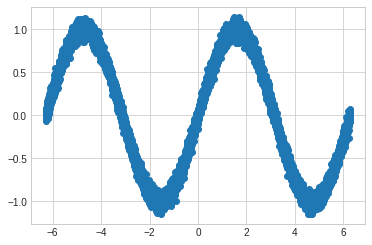

In [35]:
plt.scatter(df_02["x"], df_02["y"],
            marker='o',
            );

## 3.3 load the tips dataset from seaborn

In [42]:
import seaborn as sns

In [43]:
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Also show the high-level data summary for this dataset

In [39]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [40]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## 3.4 plot pairplot, jointplot, catplot, displot, and HeatMap for the above dataset and give your comments on each plot

Pairplot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


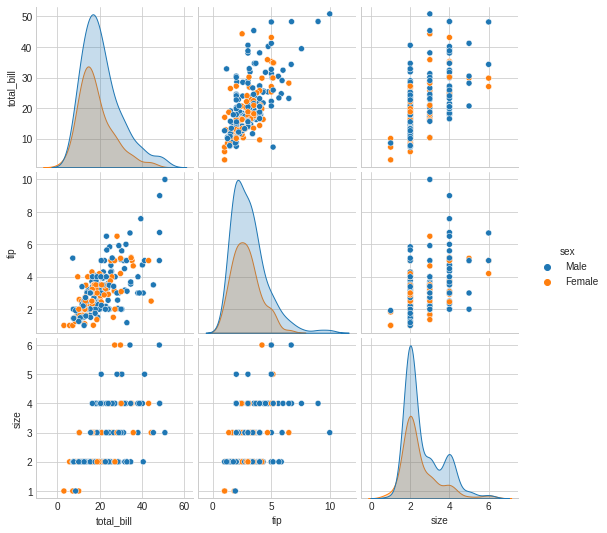

In [51]:
sns.pairplot(data = df_tips,
             hue='sex',
             size=2.5);

Comment: The pair plot allows for a simple way to investigate one variable (i.e. hue = "sex") against all of the other variables in the dataset.

While this data doesn't seem to show any obvious differences in total bills/tips between Male and Female, the plots are easy to create and useful for exploratory data analysis.

Jointplot

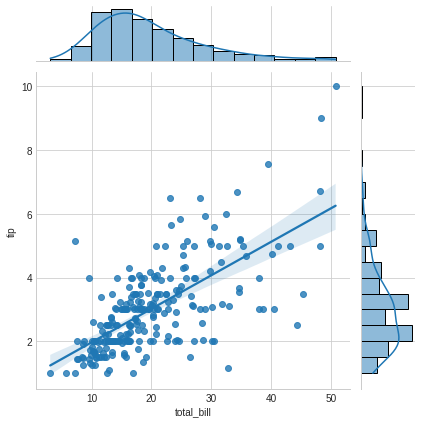

In [46]:
sns.jointplot(data=df_tips,
              x = "total_bill",
              y = "tip",
              kind='reg');

Comments: This joint plot is showing that there is a correlation between the total bill increasing and the tip amount increasing.

Also, the histograms on the axises help show where the majority of the distribution lies.

Catplot

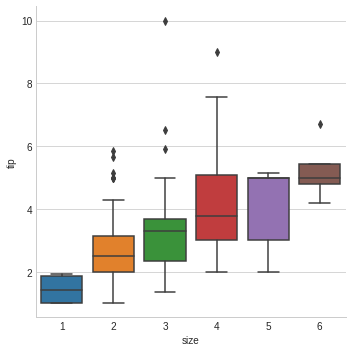

In [66]:
sns.catplot(data=df_tips, x = "size", y="tip", kind="box");

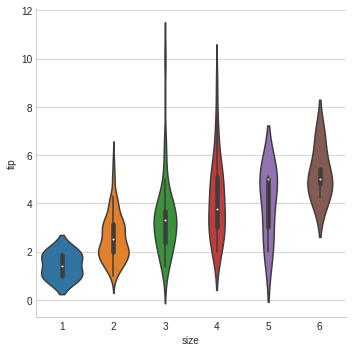

In [67]:
sns.catplot(data=df_tips, x = "size", y="tip", kind="violin");

Comment: This cat plot shows that there is a different spread in the tip size based on the size (or number of people) of the group leaving the tip.

Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


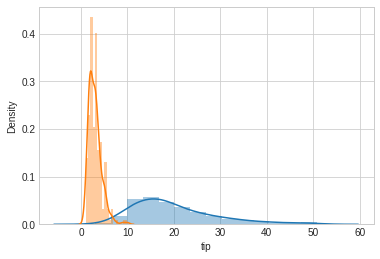

In [59]:
sns.distplot(df_tips['total_bill'])
sns.distplot(df_tips['tip']);

Comment: This distplot shows the distribution of each of the columns and is easy to overlap with each other. Provides a very simple way to compare distributions visually.

HeatMap


In [86]:
# prep the data for Days so they can be numerical
df_tips["day_numeric"] = df_tips["day"].astype("category").cat.codes

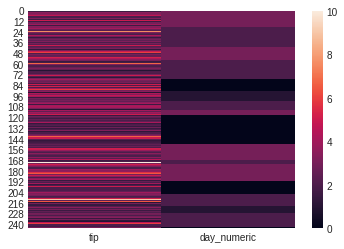

In [87]:
ax = sns.heatmap(data = df_tips[["tip", "day_numeric"]]);

Comment: This heat map is not showing much interesting patterns between the tips and the days of the week other than the amount of tips received is slightly different on different days of the week.

# Reference

“Properties of Matrix Multiplication (Article).” Khan Academy, Khan Academy, https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:properties-of-matrix-multiplication/a/properties-of-matrix-multiplication. 

Published by Thom Ives on November 1, and Thom Ives. “Simple Matrix Inversion in Pure Python without Numpy or Scipy.” Integrated Machine Learning and Artificial Intelligence, 1 Nov. 2018, https://integratedmlai.com/matrixinverse/. 


“Statistical Data Visualization.” Seaborn, https://seaborn.pydata.org/index.html. 